# import dataset

In [66]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

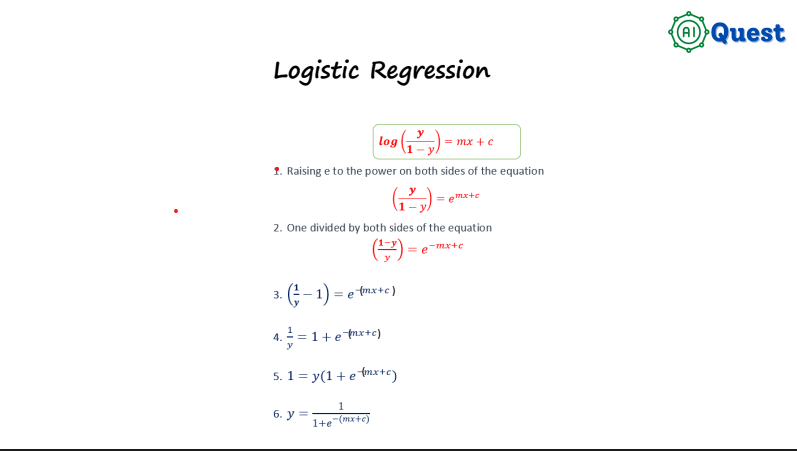

In [67]:
from IPython.display import Image
Image("logit.png")

In [68]:
df = pd.read_csv('shoe.csv')

In [69]:
df.head()

,size(cm),class(y)
0,9.500,Female
1,10.125,Male
2,10.410,Male
3,9.810,Female
4,11.050,Male


In [70]:
df.shape

(40, 2)

In [71]:
df.isnull().sum()

size(cm)    0
class(y)    0
dtype: int64

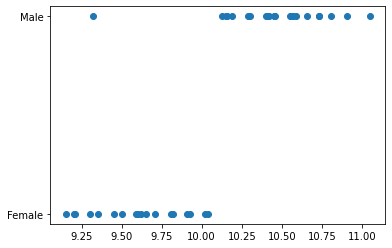

In [72]:
plt.scatter(df['size(cm)'], df['class(y)'])

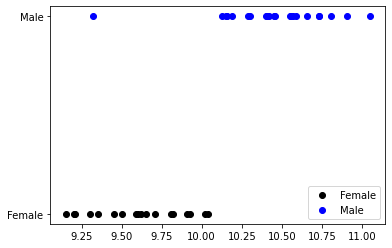

In [73]:
df0 = df[df['class(y)'] == 'Female']
df1 = df[df['class(y)'] == 'Male']


plt.scatter(df0['size(cm)'], df0['class(y)'], color = 'black', label='Female')
plt.scatter(df1['size(cm)'], df1['class(y)'], color = 'blue', label='Male')
plt.legend()

# Preprocessing

In [74]:
df['class(y)'] = df['class(y)'].replace(['Male', 'Female'], [1,0])

In [75]:
df.head()

,size(cm),class(y)
0,9.500,0
1,10.125,1
2,10.410,1
3,9.810,0
4,11.050,1


# Traning and Testing 

In [76]:
xtrain,xtest,ytrain,ytest=tts(df[['size(cm)']], df['class(y)'], test_size=0.30, random_state=23)

# LogisticRegression

In [77]:
from sklearn.linear_model import LogisticRegression

In [78]:
lreg = LogisticRegression()

# Trainning

In [79]:
lreg.fit(xtrain,ytrain)

LogisticRegression()

In [80]:
lreg.coef_

array([[2.18010493]])

In [81]:
lreg.intercept_

array([-21.57887122])

In [82]:
lreg.predict_proba(xtest)

array([[0.29396387, 0.70603613],
       [0.15962146, 0.84037854],
       [0.60110044, 0.39889956],
       [0.82081896, 0.17918104],
       [0.66187588, 0.33812412],
       [0.25082446, 0.74917554],
       [0.54245772, 0.45754228],
       [0.54786346, 0.45213654],
       [0.19446793, 0.80553207],
       [0.42326553, 0.57673447],
       [0.23090196, 0.76909804],
       [0.36605148, 0.63394852]])

# Testing

In [83]:
lreg_pred=lreg.predict(xtest)
lreg_pred

array([1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1], dtype=int64)

In [84]:
lreg.decision_function(xtest)

array([ 0.87620952,  1.66104729, -0.41005239, -1.5219059 , -0.67166498,
        1.09422001, -0.17024084, -0.19204189,  1.42123575,  0.30938224,
        1.20322526,  0.54919378])

In [97]:
lreg_mse=mean_squared_error(ytest,lreg_pred)
lreg_mae=mean_absolute_error(ytest,lreg_pred)
lreg_r2=r2_score(ytest,lreg_pred)
print("LogisticRegression mean_squared_error \"MSE:\"",lreg_mse)
print("LogisticRegression mean_absolute_error \"MAE:\"",lreg_mae)
print("LogisticRegression r2_score:",lreg_r2)

LogisticRegression mean_squared_error "MSE:" 0.08333333333333333
LogisticRegression mean_absolute_error "MAE:" 0.08333333333333333
LogisticRegression r2_score: 0.6666666666666667


In [98]:
logistic_score=lreg.score(xtest,ytest)
logistic_score

0.9166666666666666

In [85]:
ytest

18    1
23    1
8     0
22    0
33    0
32    1
10    0
3     0
14    1
30    0
28    1
20    1
Name: class(y), dtype: int64

In [99]:
logit = lreg.score(xtest, ytest)
logit

0.9166666666666666

# K Neighbors Regressor

In [100]:
from sklearn.neighbors import KNeighborsRegressor

In [101]:
knn = KNeighborsRegressor(n_neighbors = 5)

In [102]:
knn.fit(xtrain, ytrain)

KNeighborsRegressor()

In [103]:
knn_pred=knn.predict(xtest)

In [104]:
knn_pred

array([1. , 1. , 0. , 0.2, 0. , 1. , 0. , 0. , 1. , 0.4, 1. , 0.8])

In [105]:
knn_score=knn.score(xtest,ytest)
knn_score

0.92

In [106]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [107]:
knn_mse=mean_squared_error(ytest,knn_pred)
knn_mae=mean_absolute_error(ytest,knn_pred)
knn_r2=r2_score(ytest,knn_pred)
print("KNN mean_squared_error \"MSE:\"",knn_mse)
print("KNN mean_absolute_error \"MAE:\"",knn_mae)
print("KNN r2_score:",knn_r2)

KNN mean_squared_error "MSE:" 0.02
KNN mean_absolute_error "MAE:" 0.06666666666666667
KNN r2_score: 0.92


In [109]:
data = {'Name': ['KNN mean_squared_error','LogisticRegression mean_squared_error',
              'KNN mean_absolute_error','LogisticRegression mean_absolute_error',
              'KNN r2_score','LogisticRegression r2_score','KNN_score','logistic_score'],
     'Accuracy': [knn_mse,lreg_mse, knn_mae,lreg_mae,knn_r2,lreg_r2,knn_r2,logistic_score]}
df_after_pred = pd.DataFrame(data=data)

In [110]:
df_after_pred

,Name,Accuracy
0,KNN mean_squared_error,0.020000
1,LogisticRegression mean_squared_error,0.083333
2,KNN mean_absolute_error,0.066667
3,LogisticRegression mean_absolute_error,0.083333
4,KNN r2_score,0.920000
5,LogisticRegression r2_score,0.666667
6,KNN_score,0.920000
7,logistic_score,0.916667


In [111]:
sns.barplot(y="NAME", x="ACCURACY", data=df_after_pred,palette='Set1')

ValueError: Could not interpret input 'ACCURACY'